## make the filament mock observations, but with masking to compare

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u
from astropy.io import fits

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'mask_galaxies.ipynb'
%run 'extract_filament.ipynb'

### load data

In [2]:
machine = 'chinook'
plotchecks = True
slicewidth=5.
distance='50Mpc'
resolution=None

In [3]:
data_tuple_5 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 50Mpc is 13.0357429643.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,13.0357429643 appended.


### cutout section of the array that contains the filament

In [4]:
xystarts = [40.,0.]
size     = [20.,20.]
data_cutout = data_tuple_5[0]
data_cutout = data_cutout[(40./100.*32000):(60./100.*32000),0:(20./100.*32000)]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [5]:
data_cutout.shape

(6400, 6400)

### mask the galaxies

In [6]:
resolution = data_tuple_5[3]
print resolution

13.0357429643


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


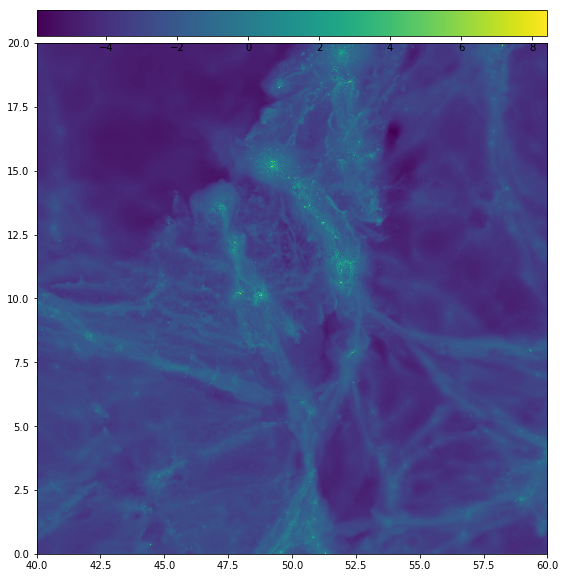

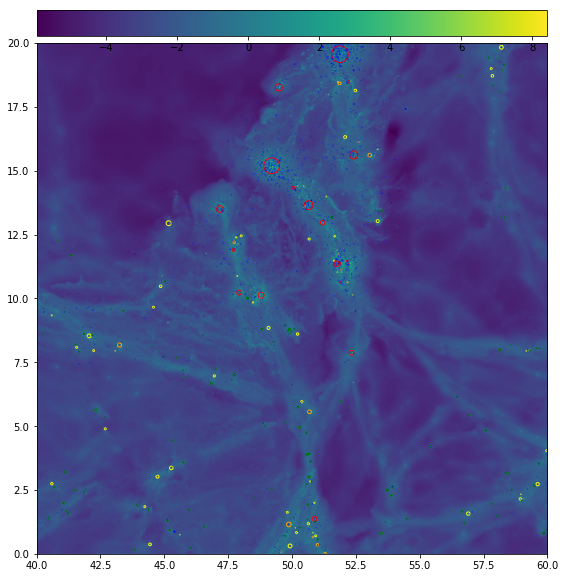

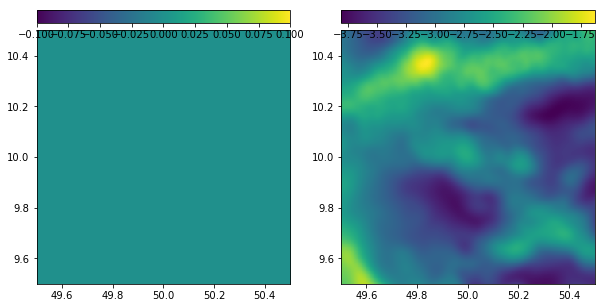

In [7]:
masked_data = maskgalaxies(data_cutout,xystarts,size,slicewidth,distance,resolution,debug=False,verbose=False)

### extract the filament (both data and mask)

cutout is supplied - will extract filament from the cutout.
The type of size is <type 'float'>
Region 1: [ 2528.  2144.  2368.  2752.] , [ 3360.  4480.  4480.  3360.]
xacross_length,yacross_length,xdown_length,ydown_length:  223, 0, -383, 1120
xacross_length > yacross_length:
iterable: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

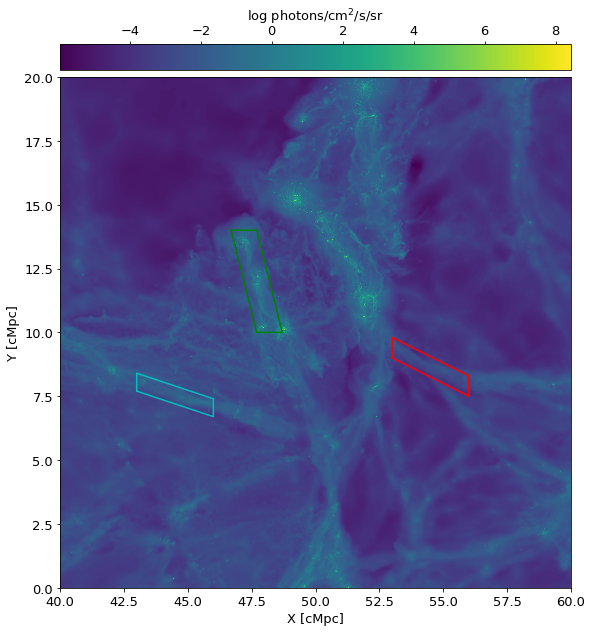

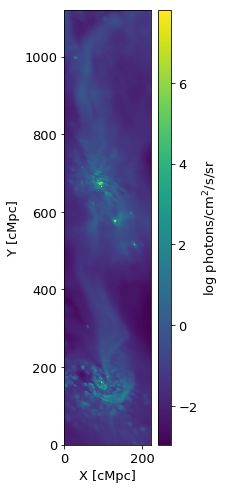

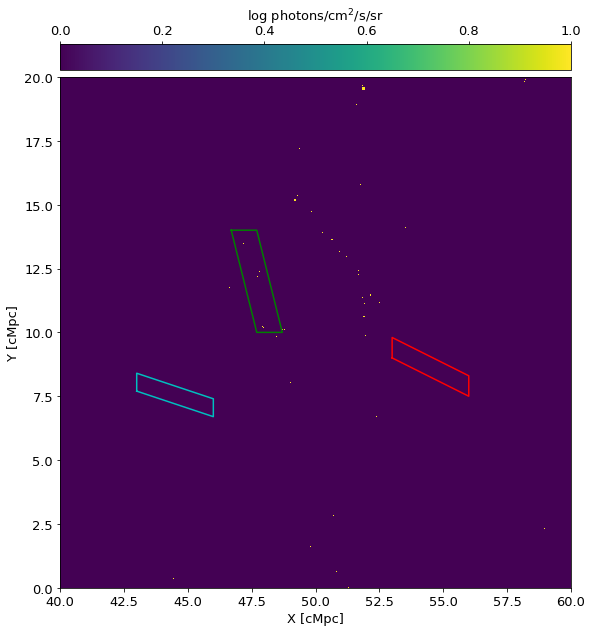

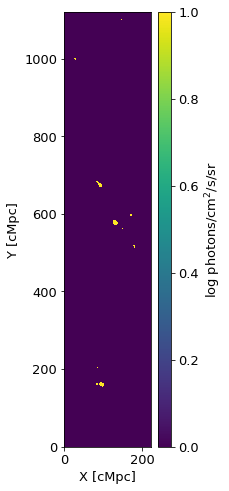

In [8]:
SBdata_cutout = extractfilament(cutout=masked_data.data,plotchecks=True)
mask_cutout = extractfilament(cutout=masked_data.mask,plotchecks=True)

### add the noise

In [9]:
exptime = 60.*60.*1000.
filterwidth = 1
CMOS = True
ROnoise = None
includemeannoise = True

In [ ]:
noiseadded_signal,B_sky_array,R_array,D_array = addnoise(SBdata_cutout,resolution,exptime=exptime,filterwidth=filterwidth,\
                                                         CMOS=CMOS,R=ROnoise,debugging=True,includemeannoise=includemeannoise,\
                                                         plotchecks=plotchecks)

### bin the data (using the mask)

In [ ]:
factor=8
noiseadded_binned,mask_none, fillvalue_none = imreduce_masked(noiseadded_unbinned,factor,\
                                                              log=False,masking=False,\
                                                              method='sum')

print noiseadded_binned.shape
print ""

fig,(ax1) = plt.subplots(1,1,figsize = (8.5, 7.))
map = 'bone'; 
plotfilamentnice(noiseadded_binned,ax1,mymap=map,label='')
